In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.cm as cm
from sklearn.decomposition import PCA
import tools
import importlib
importlib.reload(tools)

<module 'tools' from '/home/eliska/evolution/code/tools.py'>

In [2]:
morphotopes = gpd.read_parquet('/data/uscuni-evolution/all_joined_nl.parquet')
morphotopes

,geometry,initially_noise,level_1_label,level_2_label,level_3_label,level_4_label,level_5_label,level_6_label,level_7_label,num_buildings,...,mibElo,mibERI,mibCCo,mibLAL,mibFR,mibSCo,micBAD,midBAD,limLPS,limAre
morphotope_id,,,,,,,,,,,,,,,,,,,,,
521011_225_18,"MULTIPOLYGON (((4053728.884 3307972.525, 40537...",False,1,2,4,6,9,18,36,177,...,0.620055,0.978864,0.507343,16.388410,2.329022,2.329022,94.435073,185.274935,1.0,11348.957087
521011_225_33,"MULTIPOLYGON (((4050770.63 3308811.009, 405077...",False,1,2,4,5,8,16,33,119,...,0.665201,0.981524,0.526340,18.899086,2.686266,2.686266,264.679079,361.560865,1.0,12878.289441
518117_85_0,"MULTIPOLYGON (((4022344.047 3314208.157, 40223...",False,1,2,3,4,7,13,28,99,...,0.791933,0.935607,0.525757,15.899725,2.298359,2.298359,64.892938,348.053095,1.0,3366.740133
518117_85_1,"MULTIPOLYGON (((4022722.253 3314400.16, 402270...",False,2,4,7,15,22,52,95,127,...,0.713726,0.887755,0.538533,17.476544,2.353580,2.353580,49.204522,54.063885,1.0,2690.988675
518117_85_6,"MULTIPOLYGON (((4020342.166 3313838.196, 40203...",False,2,4,7,12,18,40,75,110,...,0.805763,0.881491,0.500660,16.662267,2.299849,2.299849,48.120645,41.022839,1.0,1978.213503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515406_0_213,"MULTIPOLYGON (((4041294.534 3090233.245, 40412...",False,2,4,8,17,26,57,108,199,...,0.770499,0.443847,0.351917,76.616847,4.150403,4.150403,94.859974,78.712397,1.0,18852.599002
515406_0_204,"MULTIPOLYGON (((4041561.836 3090349.241, 40415...",False,2,4,8,17,26,57,110,183,...,0.505559,0.826077,0.397566,27.408483,2.522097,2.522097,37.019730,40.905609,1.0,4437.607859
515406_0_286,"MULTIPOLYGON (((4041195.366 3089923.462, 40411...",False,2,4,7,13,20,46,84,95,...,0.723351,1.004207,0.580684,11.650693,1.399535,1.399535,38.827705,47.386602,1.0,1824.192667


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43],
 [Text(0, 0, '(1000, 1010]'),
  Text(1, 0, '(1440, 1450]'),
  Text(2, 0, '(1580, 1590]'),
  Text(3, 0, '(1590, 1600]'),
  Text(4, 0, '(1610, 1620]'),
  Text(5, 0, '(1620, 1630]'),
  Text(6, 0, '(1640, 1650]'),
  Text(7, 0, '(1660, 1670]'),
  Text(8, 0, '(1670, 1680]'),
  Text(9, 0, '(1680, 1690]'),
  Text(10, 0, '(1690, 1700]'),
  Text(11, 0, '(1700, 1710]'),
  Text(12, 0, '(1710, 1720]'),
  Text(13, 0, '(1720, 1730]'),
  Text(14, 0, '(1730, 1740]'),
  Text(15, 0, '(1740, 1750]'),
  Text(16, 0, '(1750, 1760]'),
  Text(17, 0, '(1760, 1770]'),
  Text(18, 0, '(1770, 1780]'),
  Text(19, 0, '(1780, 1790]'),
  Text(20, 0, '(1790, 1800]'),
  Text(21, 0, '(1800, 1810]'),
  Text(22, 0, '(1810, 1820]'),
  Text(23, 0, '(1820, 1830]'),
  Text(24, 

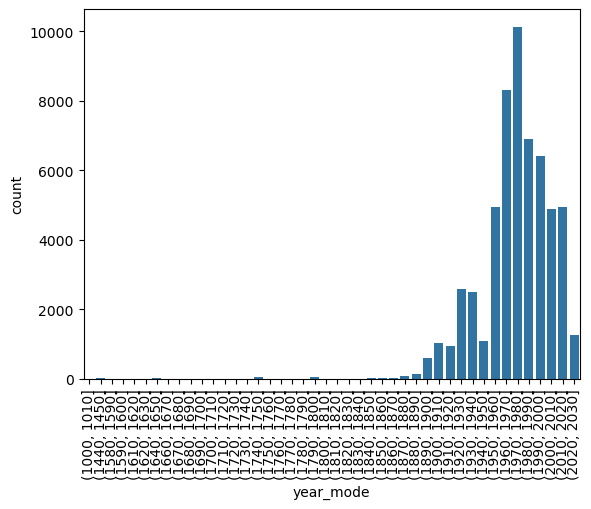

In [3]:
sns.countplot(x='year_mode', data=morphotopes, order=sorted(morphotopes["year_mode"].unique())  # alphabetical order
)

# Rotate x-axis labels vertically
plt.xticks(rotation=90)

In [10]:
pivot3 = tools.pivot_tbl(morphotopes,3)
pivot3.to_csv("tables/proportions3_nl.csv")

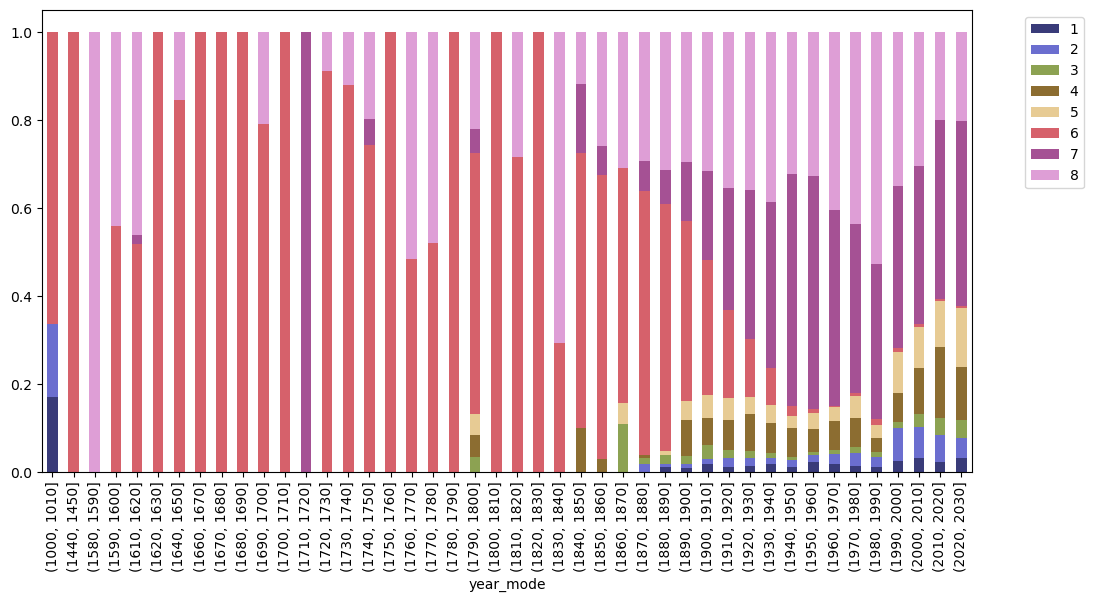

In [5]:
tools.hist(pivot3)

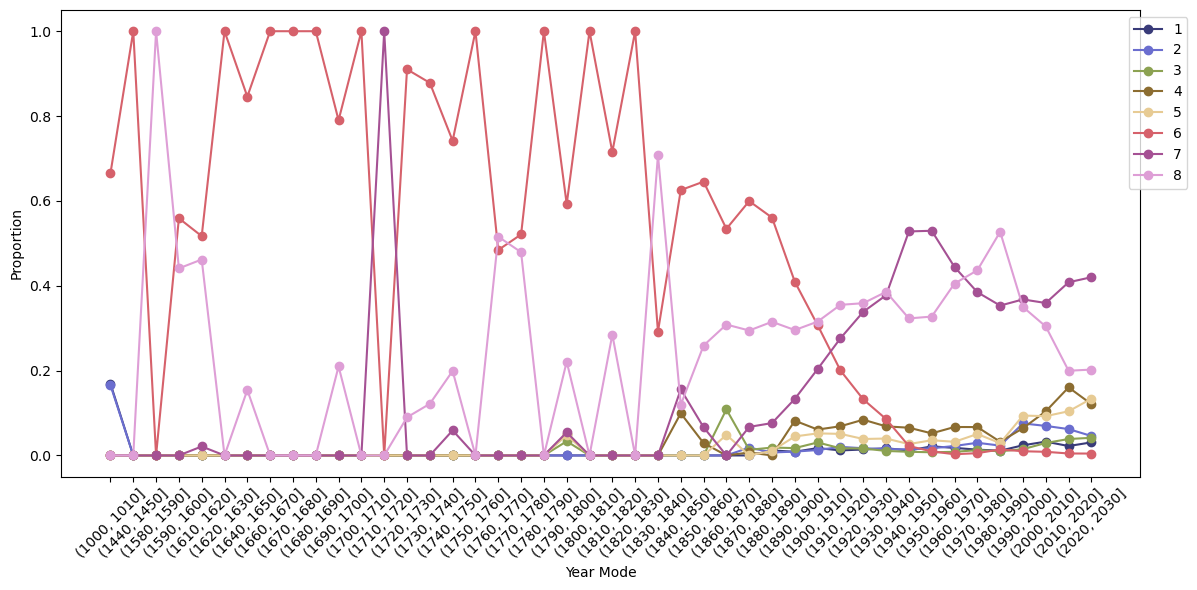

In [6]:
tools.line_plot(pivot3)

In [7]:
pivot3_cum = tools.pivot_tbl_cum(morphotopes,3)
pivot3_cum

level_3_label,1,2,3,4,5,6,7,8
year_mode,,,,,,,,
"(1000, 1010]",0.169284,0.165794,0.000000,0.000000,0.000000,0.664921,0.000000,0.000000
"(1440, 1450]",0.035609,0.034875,0.000000,0.000000,0.000000,0.929515,0.000000,0.000000
"(1580, 1590]",0.035081,0.034358,0.000000,0.000000,0.000000,0.915732,0.000000,0.014828
"(1590, 1600]",0.031170,0.030527,0.000000,0.000000,0.000000,0.875964,0.000000,0.062339
"(1610, 1620]",0.028973,0.028375,0.000000,0.000000,0.000000,0.850657,0.001493,0.090502
"(1620, 1630]",0.027714,0.027143,0.000000,0.000000,0.000000,0.857143,0.001429,0.086571
"(1640, 1650]",0.018589,0.018206,0.000000,0.000000,0.000000,0.853392,0.000958,0.108854
"(1660, 1670]",0.017108,0.016755,0.000000,0.000000,0.000000,0.865079,0.000882,0.100176
"(1670, 1680]",0.015645,0.015323,0.000000,0.000000,0.000000,0.876613,0.000806,0.091613


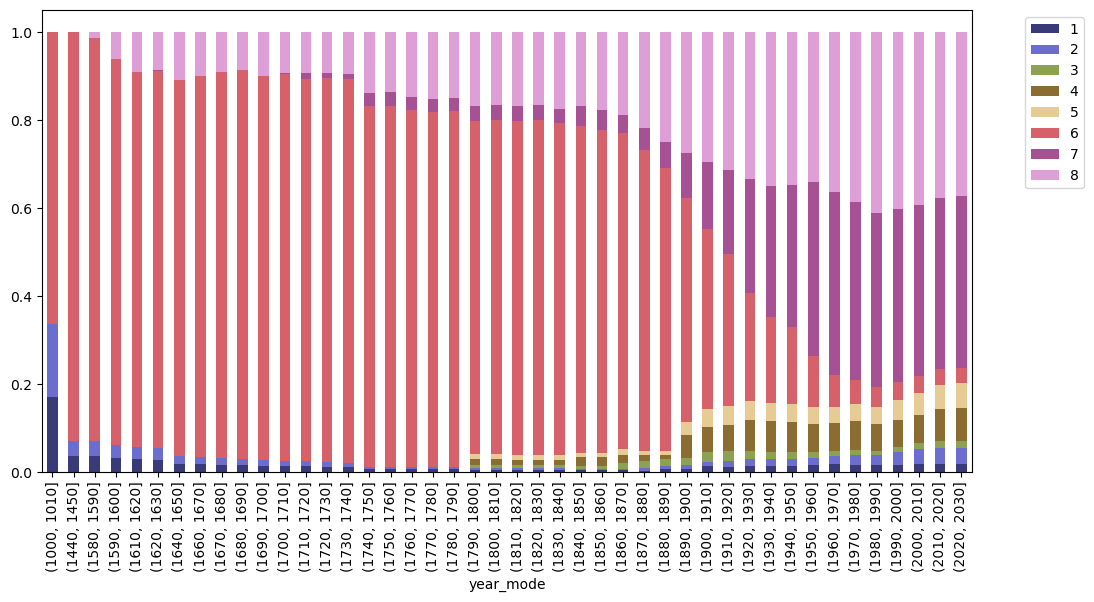

In [8]:
tools.hist(pivot3_cum)

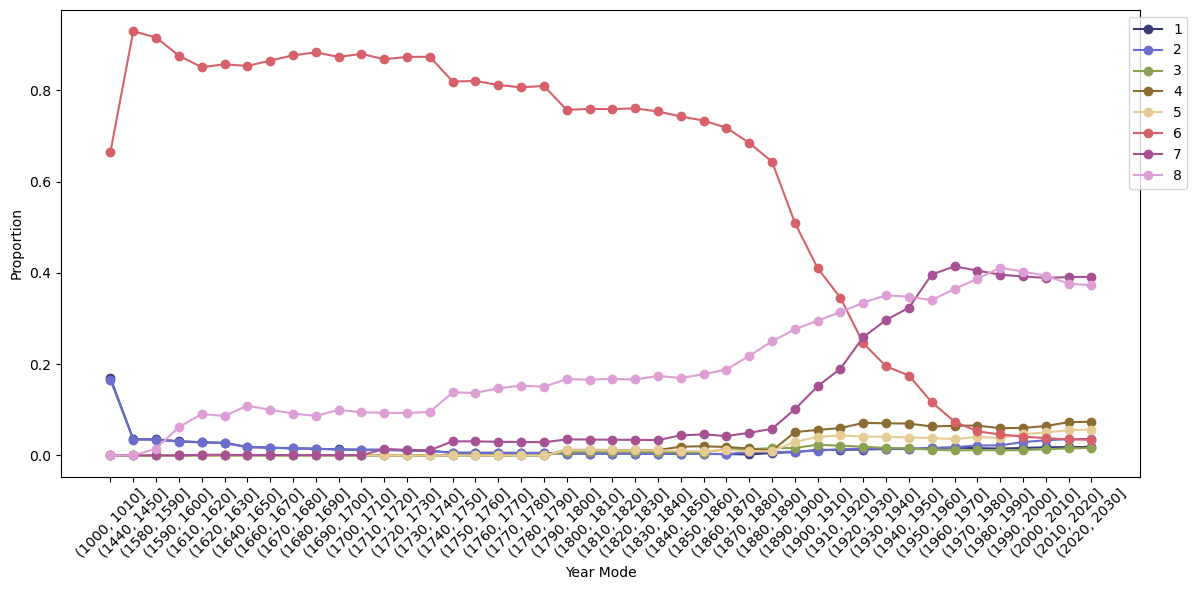

In [9]:
tools.line_plot(pivot3_cum)

In [3]:
nuts = gpd.read_file(
    "https://gisco-services.ec.europa.eu/distribution/v2/nuts/gpkg/NUTS_RG_01M_2024_3035.gpkg"
)

In [4]:
nuts1 = nuts[(nuts["CNTR_CODE"]=='NL') & (nuts["LEVL_CODE"]==1)]
nuts1

,NUTS_ID,LEVL_CODE,CNTR_CODE,NAME_LATN,NUTS_NAME,MOUNT_TYPE,URBN_TYPE,COAST_TYPE,geometry
1703,NL1,1,NL,Noord-Nederland,Noord-Nederland,NaN,NaN,NaN,"MULTIPOLYGON (((4105253.514 3377891.917, 41080..."
1705,NL2,1,NL,Oost-Nederland,Oost-Nederland,NaN,NaN,NaN,"POLYGON ((4062709.694 3308062.783, 4063436.233..."
1709,NL4,1,NL,Zuid-Nederland,Zuid-Nederland,NaN,NaN,NaN,"POLYGON ((4012218.894 3199384.871, 4013620.654..."
1711,NL3,1,NL,West-Nederland,West-Nederland,NaN,NaN,NaN,"MULTIPOLYGON (((3997019.052 3331358.207, 39993..."


In [5]:
morphotopes_centr = morphotopes.copy()
morphotopes_centr["geometry"] = morphotopes_centr.geometry.centroid
morphotopes_centr.columns

Index(['geometry', 'initially_noise', 'level_1_label', 'level_2_label',
       'level_3_label', 'level_4_label', 'level_5_label', 'level_6_label',
       'level_7_label', 'num_buildings', 'year_mean', 'year_median',
       'year_min', 'year_q10', 'year_q90', 'year_max', 'year_std', 'year_mode',
       'sdbAre', 'sdbPer', 'sdbCoA', 'ssbCCo', 'ssbSqu', 'ssbERI', 'ssbElo',
       'libNCo', 'ldbPWL', 'ltcBuA', 'mtbAli', 'mtbNDi', 'ltbIBD', 'stbSAl',
       'sdsLen', 'sssLin', 'ldsMSL', 'ldsRea', 'ldsAre', 'sisBpM', 'sdsSPW',
       'sdsSPO', 'sdsSWD', 'lcdMes', 'linP3W', 'linP4W', 'linPDE', 'lcnClo',
       'lddNDe', 'linWID', 'ldsCDL', 'xcnSCl', 'mtdMDi', 'sddAre', 'midRea',
       'midAre', 'sdcLAL', 'sdcAre', 'sscCCo', 'sscERI', 'mtcWNe', 'mdcAre',
       'ltcWRB', 'sicCAR', 'sdsAre', 'mibCou', 'mibAre', 'mibLen', 'mibElo',
       'mibERI', 'mibCCo', 'mibLAL', 'mibFR', 'mibSCo', 'micBAD', 'midBAD',
       'limLPS', 'limAre'],
      dtype='object')

In [6]:
joined = morphotopes_centr.sjoin(nuts1, predicate="within")

In [7]:
joined

,geometry,initially_noise,level_1_label,level_2_label,level_3_label,level_4_label,level_5_label,level_6_label,level_7_label,num_buildings,...,limAre,index_right,NUTS_ID,LEVL_CODE,CNTR_CODE,NAME_LATN,NUTS_NAME,MOUNT_TYPE,URBN_TYPE,COAST_TYPE
morphotope_id,,,,,,,,,,,,,,,,,,,,,
521011_225_18,POINT (4054132.585 3308742.577),False,1,2,4,6,9,18,36,177,...,11348.957087,1703,NL1,1,NL,Noord-Nederland,Noord-Nederland,NaN,NaN,NaN
521011_225_33,POINT (4051346.457 3309160.942),False,1,2,4,5,8,16,33,119,...,12878.289441,1703,NL1,1,NL,Noord-Nederland,Noord-Nederland,NaN,NaN,NaN
518117_85_0,POINT (4022688.54 3314310.976),False,1,2,3,4,7,13,28,99,...,3366.740133,1703,NL1,1,NL,Noord-Nederland,Noord-Nederland,NaN,NaN,NaN
518117_85_1,POINT (4022829.651 3314647.054),False,2,4,7,15,22,52,95,127,...,2690.988675,1703,NL1,1,NL,Noord-Nederland,Noord-Nederland,NaN,NaN,NaN
518117_85_6,POINT (4020468.763 3314029.545),False,2,4,7,12,18,40,75,110,...,1978.213503,1703,NL1,1,NL,Noord-Nederland,Noord-Nederland,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515406_0_213,POINT (4041401.71 3090319.283),False,2,4,8,17,26,57,108,199,...,18852.599002,1709,NL4,1,NL,Zuid-Nederland,Zuid-Nederland,NaN,NaN,NaN
515406_0_204,POINT (4041675.376 3090427.989),False,2,4,8,17,26,57,110,183,...,4437.607859,1709,NL4,1,NL,Zuid-Nederland,Zuid-Nederland,NaN,NaN,NaN
515406_0_286,POINT (4041358.114 3089923.891),False,2,4,7,13,20,46,84,95,...,1824.192667,1709,NL4,1,NL,Zuid-Nederland,Zuid-Nederland,NaN,NaN,NaN


In [8]:
nuts_counts = (
    joined.pivot_table(
        index=["NUTS_NAME", "year_mode"],
        columns="level_3_label",
        values="num_buildings",
        aggfunc="sum",
        fill_value=0
    )
)
nuts_counts

level_3_label                    1      2     3      4      5     6       7  \
NUTS_NAME       year_mode                                                     
Noord-Nederland (1440, 1450]     0      0     0      0      0    84       0   
                (1640, 1650]     0      0     0      0      0    70       0   
                (1710, 1720]     0      0     0      0      0     0     105   
                (1780, 1790]     0      0     0      0      0    57       0   
                (1790, 1800]     0      0     0      0      0     0     214   
...                            ...    ...   ...    ...    ...   ...     ...   
Zuid-Nederland  (1980, 1990]  2203   6078  1156   6360   7711  3616  123587   
                (1990, 2000]  6227  19373  1844   9585  13970  2318   91111   
                (2000, 2010]  4918  12419   931  14360  18486  2877   58804   
                (2010, 2020]  3896   8465  1366  22284  14908  1344   71168   
                (2020, 2030]  2037   2027  1813   9188   9448   422   25552   

level_3_label                      8  
NUTS_NAME       year_mode             
Noord-Nederland (1440, 1450]       0  
                (1640, 1650]       0  
                (1710, 1720]       0  
                (1780, 1790]       0  
                (1790, 1800]     293  
...                              ...  
Zuid-Nederland  (1980, 1990]  130367  
                (1990, 2000]   68948  
                (2000, 2010]   43131  
                (2010, 2020]   29896  
                (2020, 2030]   10813  

[118 rows x 8 columns]

In [9]:
nuts_counts = nuts_counts.reset_index()
nuts_counts

level_3_label,NUTS_NAME,year_mode,1,2,3,4,5,6,7,8
0,Noord-Nederland,"(1440, 1450]",0,0,0,0,0,84,0,0
1,Noord-Nederland,"(1640, 1650]",0,0,0,0,0,70,0,0
2,Noord-Nederland,"(1710, 1720]",0,0,0,0,0,0,105,0
3,Noord-Nederland,"(1780, 1790]",0,0,0,0,0,57,0,0
4,Noord-Nederland,"(1790, 1800]",0,0,0,0,0,0,214,293
...,...,...,...,...,...,...,...,...,...,...
113,Zuid-Nederland,"(1980, 1990]",2203,6078,1156,6360,7711,3616,123587,130367
114,Zuid-Nederland,"(1990, 2000]",6227,19373,1844,9585,13970,2318,91111,68948
115,Zuid-Nederland,"(2000, 2010]",4918,12419,931,14360,18486,2877,58804,43131
116,Zuid-Nederland,"(2010, 2020]",3896,8465,1366,22284,14908,1344,71168,29896


In [10]:
agg_cols = [i for i in range(1, 9)]

nuts_counts['total_count'] = nuts_counts[agg_cols].sum(axis=1)
for col in agg_cols:
    nuts_counts[f'{col}_pct'] = nuts_counts[col] / nuts_counts['total_count']

nuts_counts

level_3_label,NUTS_NAME,year_mode,1,2,3,4,5,6,7,8,total_count,1_pct,2_pct,3_pct,4_pct,5_pct,6_pct,7_pct,8_pct
0,Noord-Nederland,"(1440, 1450]",0,0,0,0,0,84,0,0,84,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
1,Noord-Nederland,"(1640, 1650]",0,0,0,0,0,70,0,0,70,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
2,Noord-Nederland,"(1710, 1720]",0,0,0,0,0,0,105,0,105,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
3,Noord-Nederland,"(1780, 1790]",0,0,0,0,0,57,0,0,57,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
4,Noord-Nederland,"(1790, 1800]",0,0,0,0,0,0,214,293,507,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.422091,0.577909
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,Zuid-Nederland,"(1980, 1990]",2203,6078,1156,6360,7711,3616,123587,130367,281078,0.007838,0.021624,0.004113,0.022627,0.027434,0.012865,0.439689,0.463811
114,Zuid-Nederland,"(1990, 2000]",6227,19373,1844,9585,13970,2318,91111,68948,213376,0.029183,0.090793,0.008642,0.044921,0.065471,0.010863,0.426997,0.323129
115,Zuid-Nederland,"(2000, 2010]",4918,12419,931,14360,18486,2877,58804,43131,155926,0.031541,0.079647,0.005971,0.092095,0.118556,0.018451,0.377128,0.276612
116,Zuid-Nederland,"(2010, 2020]",3896,8465,1366,22284,14908,1344,71168,29896,153327,0.025410,0.055209,0.008909,0.145336,0.097230,0.008766,0.464158,0.194982


In [11]:
type_names = {
    "1": "Incoherent Large-Scale Homogeneous Fabric",
    "2": "Incoherent Large-Scale Heterogeneous Fabric",
    "3": "Incoherent Small-Scale Linear Fabric",
    "4": "Incoherent Small-Scale Sparse Fabric",
    "5": "Incoherent Small-Scale Compact Fabric",
    "6": "Coherent Interconnected Fabric",
    "7": "Coherent Dense Disjoint Fabric",
    "8": "Coherent Dense Adjacent Fabric"
}


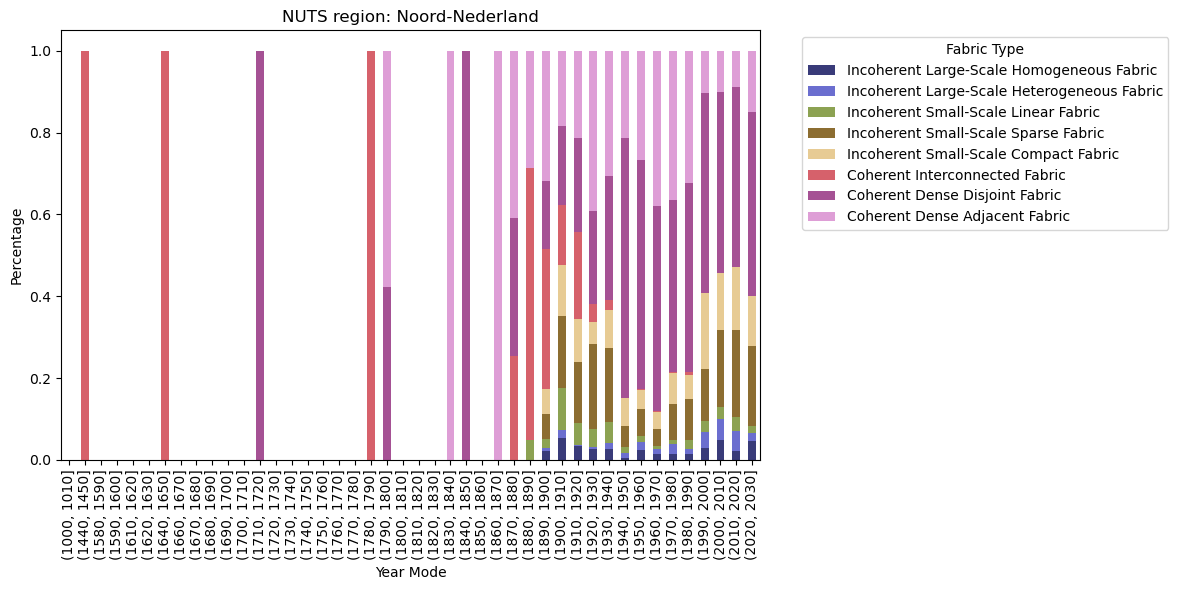

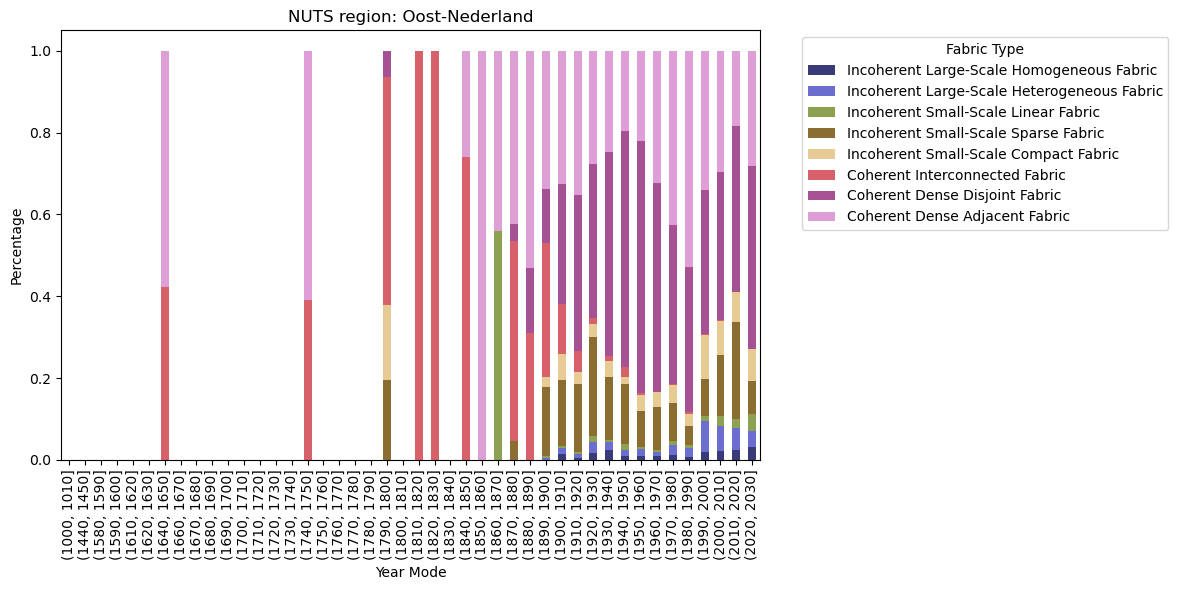

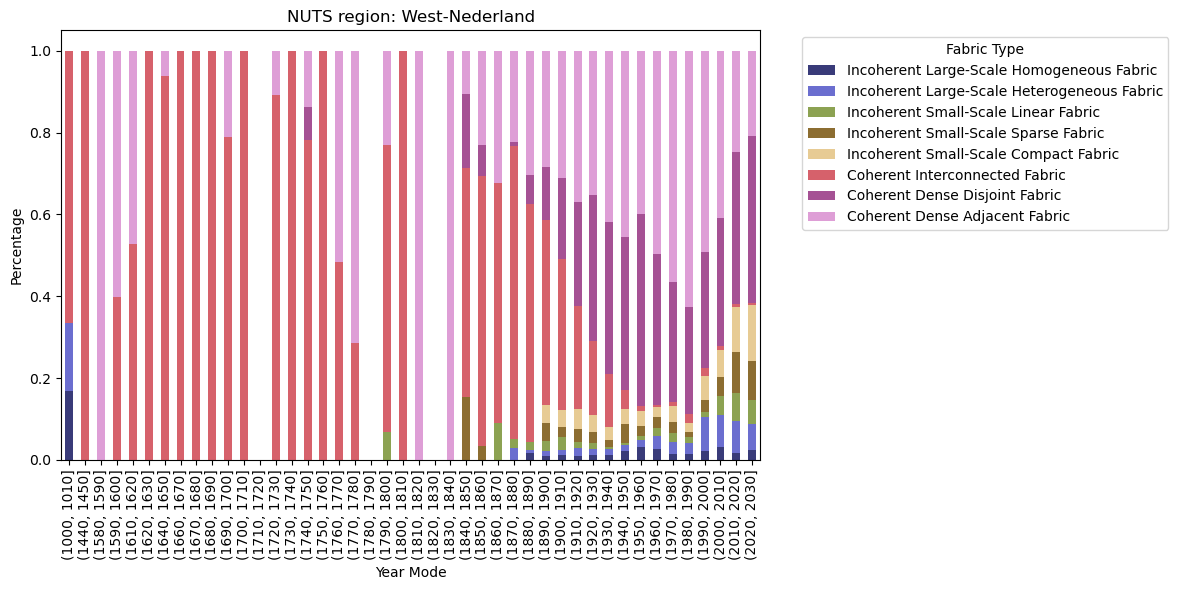

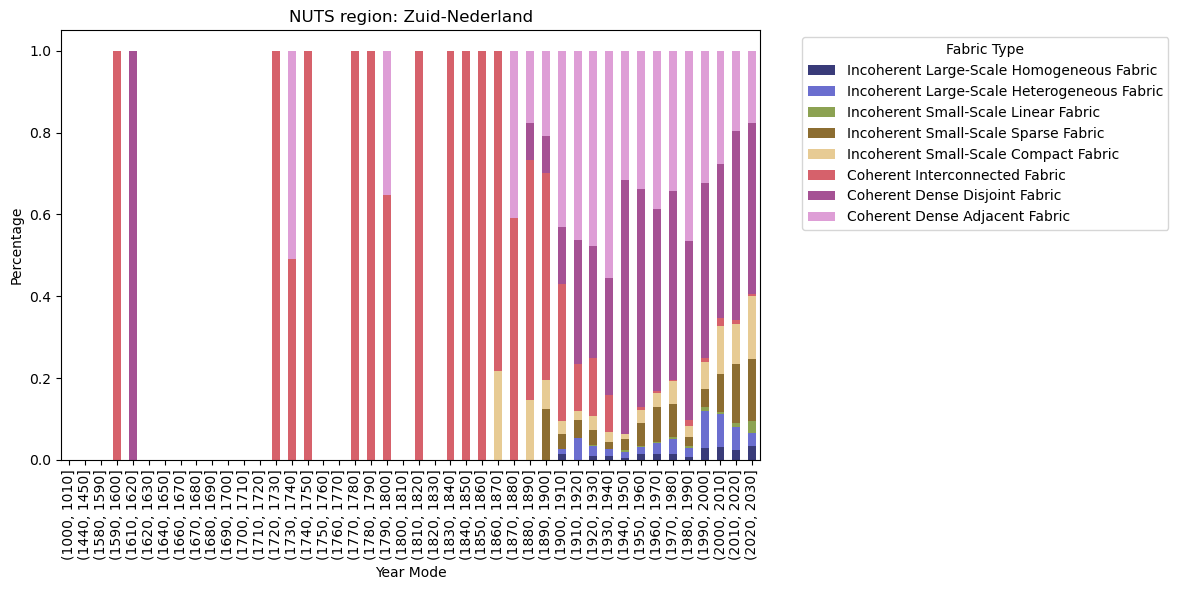

In [12]:
# Percentage columns
pct_cols = ['1_pct','2_pct','3_pct','4_pct','5_pct','6_pct','7_pct','8_pct']

# All possible year_mode values
all_year_modes = sorted(nuts_counts['year_mode'].unique())

# Unique NUTS regions
nuts_list = nuts_counts['NUTS_NAME'].unique()

for nut in nuts_list:
    df_nut = nuts_counts[nuts_counts['NUTS_NAME'] == nut].copy()
    
    # Ensure all year_mode bins exist, fill missing with zeros
    df_nut = df_nut.set_index('year_mode').reindex(all_year_modes, fill_value=0)
    
    # Plot stacked bar chart
    ax = df_nut[pct_cols].plot(
        kind='bar',
        stacked=True,
        figsize=(12,6),
        colormap='tab20b'
    )
    
    ax.set_title(f"NUTS region: {nut}")
    ax.set_ylabel("Percentage")
    ax.set_xlabel("Year Mode")
    
    # Rename legend using type_names
    handles, _ = ax.get_legend_handles_labels()
    ax.legend(handles, [type_names[col.replace('_pct','')] for col in pct_cols],
              bbox_to_anchor=(1.05, 1), loc='upper left', title="Fabric Type")
    
    plt.tight_layout()